In [41]:
import re
from gensim.models import Word2Vec
from nltk import word_tokenize
import pandas as pd
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import matplotlib.pyplot as plt


In [42]:
# Some Needed functions and constants for preprocessing

stemmer = SnowballStemmer("english")
stop = stopwords.words('english')

def remove_digits(string):
    return re.sub('[^a-zA-Z]', ' ', string )

def remove_special_chars(string):
    return re.sub(r'\s+', ' ', string)

In [26]:
# https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794
# Input: "word" which is used to search for the words similar to it in the corpus that we built from our dataset "comments"
#        "model" a word2vec model that is already trained

# Return: a 3d plot of the smiliar words to this given "word", they are plotted in 3 dimensions using PCA
def plot_words_similar(word,model):

    fig = plt.figure(figsize=(20,10))
    ## word embedding
    tot_words = [word] + [tupla[0] for tupla in
                     model.most_similar(word, topn=20)]
    X = model[tot_words]
    ## pca to reduce dimensionality from 300 to 3
    pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
    X = pca.fit_transform(X)
    ## create dtf
    dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
    dtf_["input"] = 0
    dtf_["input"].iloc[0:1] = 1
    ## plot 3d
    from mpl_toolkits.mplot3d import Axes3D
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'],
               dtf_[dtf_["input"]==0]['y'],
               dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'],
               dtf_[dtf_["input"]==1]['y'],
               dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[],
           yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)


Instead of using a pre-trained model. Here I am fitting my own Word2Vec on the training data corpus with gensim. 

In [6]:
# Reading and Preprocessing the data for the dataset
df_911 = pd.read_excel('All911Comments.xlsx',index=False).dropna()
df_911['comment'] = df_911['comment'].apply(remove_digits)
df_911['comment'] = df_911['comment'].apply(remove_special_chars)
df_911['comment'] = df_911['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_911['comment'] = df_911['comment'].apply(lambda x: ' '.join([word.lower() for word in x.split() ]))
df_911['comment'] = df_911['comment'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [15]:
# Tokenize the comment to be a list of lists
clean_comments = df_911['comment'].apply(word_tokenize)

# Train our comments 
word2vec_911 = Word2Vec(clean_comments, min_count=2)

# Printing the corpus of our model
print(word2vec_911.wv.vocab.keys())

dict_keys(['one', 'guarded', 'surveilled', 'building', 'world', 'nyet', 'yrs', 'still', 'dodgy', 'video', 'nsecurity', 'box', 'planes', 'damaged', 'filming', 'footage', 'secure', 'buildings', 'america', 'crash', 'fps', 'c', 'mon', 'y', 'u', 'remember', 'said', 'found', 'hijackers', 'passport', 'debris', 'lol', 'it', 'shame', 'pentagon', 'afford', 'camera', 'could', 'shoot', 'frames', 'per', 'second', 'let', 'start', 'go', 'fund', 'page', 'i', 'surprised', 'cruise', 'missile', 'hitting', 'the', 'time', 'cameras', 'pointing', 'every', 'direction', 'and', 'give', 'us', 'lies', 'within', 'your', 'local', 'mall', 'better', 'available', 'angles', 'n', 'nhey', 'mean', 'would', 'expect', 'good', 'quality', 'trillion', 'dollar', 'budget', 'title', 'correction', 'can', 'someone', 'please', 'point', 'plane', 'lmao', 'buy', 'conspiracies', 'dont', 'see', 'subject', 'friend', 'mines', 'dad', 'used', 'pilot', 'conclusion', 'supposed', 'flown', 'hijacker', 'way', 'whatsoever', 'skill', 'fly', 'low', 

c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


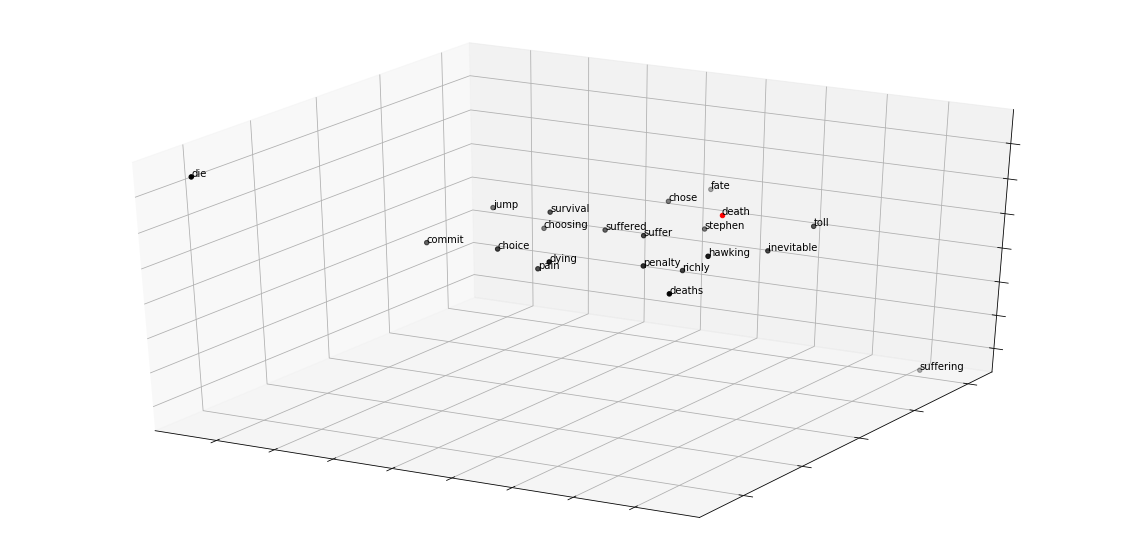

In [30]:
plot_words_similar("death",word2vec_911)    

**Using these models, we can perform various syntactic/semantic NLP word tasks with the trained vectors.**

In [14]:
# Reading and Preprocessing the data for the dataset

df_moon = pd.read_excel('AllMoonLandingComments.xlsx',index=False).dropna()

df_moon['comment'] = df_moon['comment'].apply(remove_digits)
df_moon['comment'] = df_moon['comment'].apply(remove_special_chars)
df_moon['comment'] = df_moon['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_moon['comment'] = df_moon['comment'].apply(lambda x: ' '.join([word.lower() for word in x.split() ]))
df_moon['comment'] = df_moon['comment'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Tokenize the comment to be a list of lists
clean_comments = df_moon['comment'].apply(word_tokenize)


# Train our comments 
word2vec_moon = Word2Vec(clean_comments, min_count=2)

# Printing the corpus of our model
print(word2vec_moon.wv.vocab.keys())


dict_keys(['they', 'stole', 'lot', 'backyard', 'i', 'would', 'like', 'back', 'thank', 'bye', 'oooooh', 'stone', 'lol', 'let', 'rub', 'feet', 'imagin', 'alien', 'spider', 'came', 'littl', 'hole', 'rock', 'conspiraci', 'theorist', 'n', 'bunch', 'yard', 'u', 'f', 'yes', 'put', 'found', 'moon', 'land', 'peopl', 'return', 'earth', 'amaz', 'even', 'believ', 'happen', 'that', 'awesom', 'this', 'dude', 'face', 'open', 'whi', 'keep', 'film', 'also', 'so', 'made', 'time', 'histori', 'cell', 'phone', 'can', 'not', 'go', 'today', 'ok', 'vault', 'precaut', 'contamin', 'someon', 'echo', 'background', 'hack', 'cough', 'lmfao', 'wood', 'interstellar', 'zombi', 'virus', 'leak', 'lab', 'turn', 'volum', 'hear', 'say', 'get', 'deafen', 'next', 'person', 'speak', 'what', 'grew', 'weed', 'dirt', 'serious', 'stainless', 'steel', 'work', 'vintag', 'craftsmanship', 'wait', 'brought', 'year', 'later', 'piec', 'petrifi', 'sent', 'holland', 'tri', 'pass', 'lmao', 'sure', 'seal', 'studi', 'microb', 'npriceless', '

c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


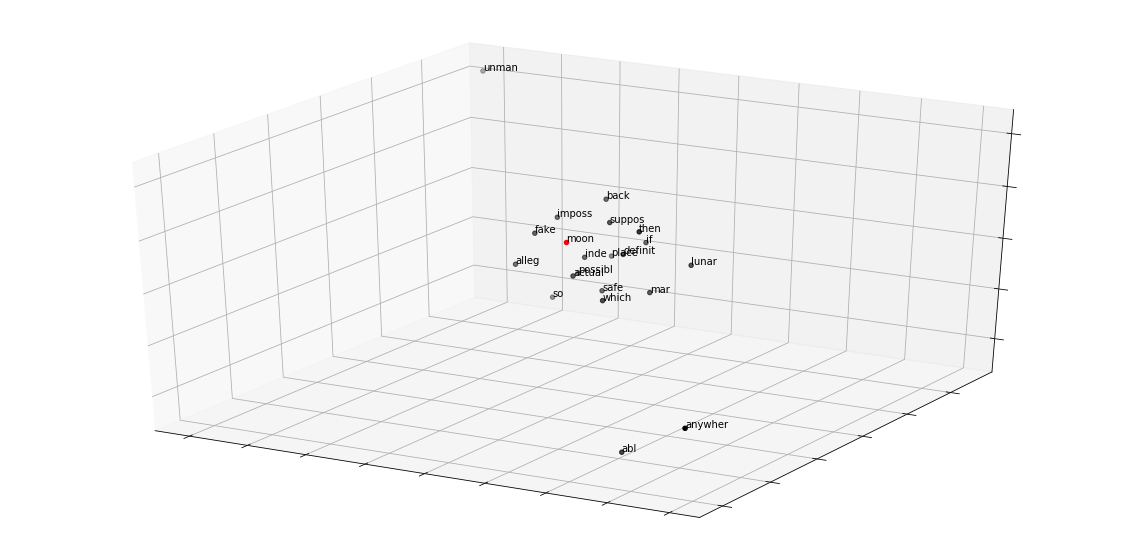

In [31]:
plot_words_similar("moon",word2vec_moon)    

In [10]:
# Reading and Preprocessing the data for the dataset

df_vaccine = pd.read_excel('AllVaccinesComments.xlsx',index=False).dropna()

df_vaccine['comment'] = df_vaccine['comment'].apply(remove_digits)
df_vaccine['comment'] = df_vaccine['comment'].apply(remove_special_chars)
df_vaccine['comment'] = df_vaccine['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_vaccine['comment'] = df_vaccine['comment'].apply(lambda x: ' '.join([word.lower() for word in x.split() ]))
df_vaccine['comment'] = df_vaccine['comment'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Tokenize the comment to be a list of lists
clean_comments = df_vaccine['comment'].apply(word_tokenize)


# Train our comments 
word2vec_vaccine = Word2Vec(clean_comments, min_count=2)

# Printing the corpus of our model
print(word2vec_vaccine.wv.vocab.keys())

dict_keys(['next', 'scientist', 'explain', 'crowd', 'fire', 'hot', 'thing', 'never', 'get', 'old', 'n', 'anti', 'vaxx', 'meme', 'kid', 'simpl', 'when', 'vaccer', 'child', 'die', 'vaccin', 'let', 'jenni', 'mccarthi', 'grim', 'reaper', 'deliv', 'news', 'the', 'guy', 'blue', 'cloth', 'give', 'impress', 'actor', 'doctor', 'what', 'fuck', 'playboy', 'model', 'know', 'medic', 'did', 'autism', 'expos', 'oxygen', 'we', 'rid', 'love', 'peopl', 'scare', 'children', 'death', 'smfh', 'don', 'wrong', 'i', 'pro', 'vax', 'doc', 'play', 'victim', 'card', 'ridicul', 'studi', 'school', 'year', 'debat', 'playmat', 'everyon', 'opinion', 'equal', 'you', 'attack', 'fact', 'pleas', 'stop', 'hurt', 'feel', 'lol', 'id', 'rather', 'aliv', 'your', 'regardless', 'obvious', 'moron', 'xa', 'it', 'even', 'sick', 'done', 'read', 'reassur', 'parent', 'caus', 'nye', 'and', 'm', 'of', 'tell', 'me', 'that', 'my', 'is', 'a', 'mistak', 'see', 'whi', 'there', 's', 'problem', 'mate', 'hate', 'somebodi', 'make', 'good', 'logi

c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


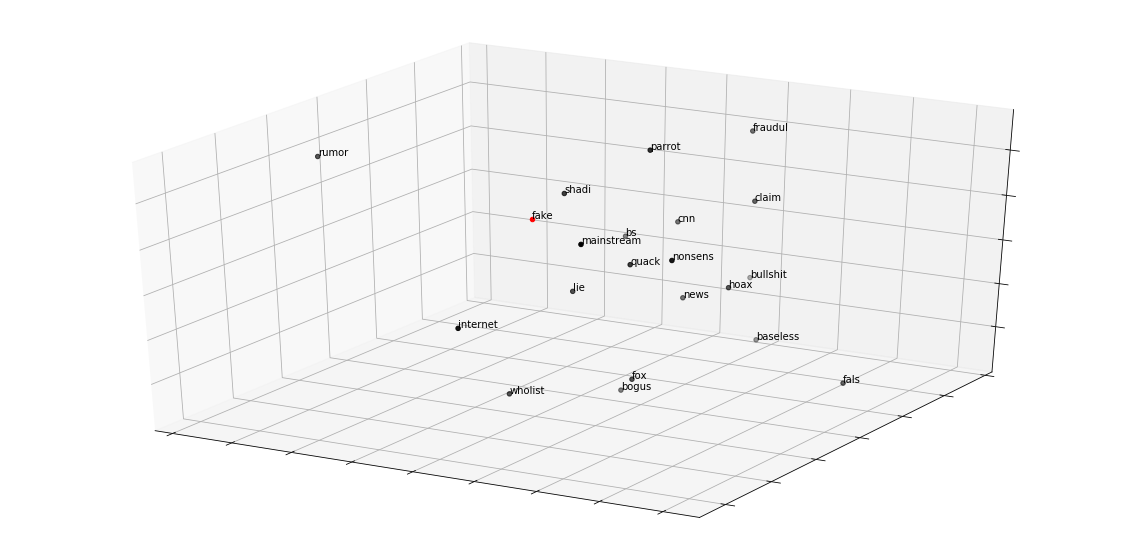

In [34]:
plot_words_similar("fake",word2vec_vaccine)    

In [11]:
# Reading and Preprocessing the data for the dataset

df_flat = pd.read_excel('AllFlatEarthComments.xlsx',index=False).dropna()

df_flat['comment'] = df_flat['comment'].apply(remove_digits)
df_flat['comment'] = df_flat['comment'].apply(remove_special_chars)
df_flat['comment'] = df_flat['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_flat['comment'] = df_flat['comment'].apply(lambda x: ' '.join([word.lower() for word in x.split() ]))
df_flat['comment'] = df_flat['comment'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Tokenize the comment to be a list of lists
clean_comments = df_flat['comment'].apply(word_tokenize)


# Train our comments 
word2vec_flat = Word2Vec(clean_comments, min_count=2)

# Printing the corpus of our model
print(word2vec_flat.wv.vocab.keys())

dict_keys(['it', 'difficult', 'win', 'argument', 'intellig', 'person', 'imposs', 'idiot', 'if', 'got', 'ta', 'get', 'togeth', 'group', 'scream', 'crazi', 'you', 'nice', 'laugh', 'disabl', 'peopl', 'free', 'countri', 'everybodi', 'right', 'ask', 'flat', 'earther', 'play', 'soccer', 'day', 'brought', 'frisbe', 'these', 'type', 'sleep', 'ruler', 'pillow', 'see', 'long', 'slept', 'i', 'believ', 'exist', 'never', 'seen', 'one', 'real', 'life', 'think', 'actor', 'spend', 'freetim', 'make', 'big', 'joke', 'mani', 'plot', 'twist', 'want', 'trip', 'space', 'who', 'els', 'watch', 'entertain', 'purpos', 'u', 'f', 'cop', 'sorri', 'park', 'nguy', 'earth', 'ncop', 'bother', 'good', 'the', 'shape', 'giant', 'dildo', 'that', 'feel', 'tell', 'like', 'they', 'when', 'stupid', 'agre', 'cstupid', 'virus', 'sure', 'spread', 'n', 'sandi', 'cheek', 'abil', 'speak', 'sun', 'round', 'nmercuri', 'nvenus', 'nearth', 'nmar', 'njupit', 'nsaturn', 'nuranus', 'nneptun', 'so', 'open', 'mind', 'brain', 'fell', 'flight

c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


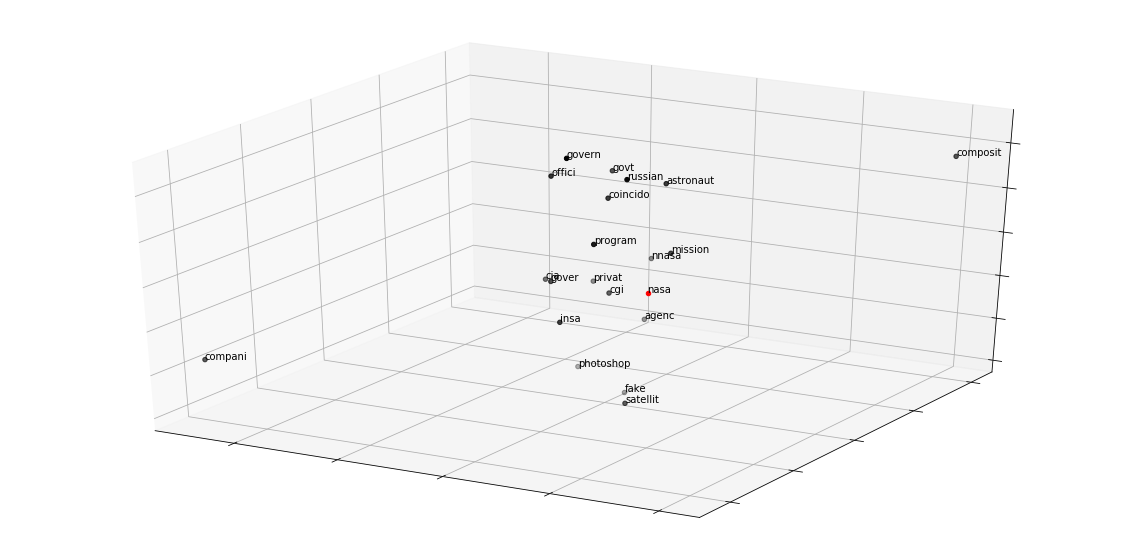

In [35]:
plot_words_similar("nasa",word2vec_flat)    

In [12]:
# Reading and Preprocessing the data for the dataset

df_chemtrails = pd.read_excel('AllchemtrailsComments.xlsx',index=False).dropna()


df_chemtrails['comment'] = df_chemtrails['comment'].apply(remove_digits)
df_chemtrails['comment'] = df_chemtrails['comment'].apply(remove_special_chars)
df_chemtrails['comment'] = df_chemtrails['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_chemtrails['comment'] = df_chemtrails['comment'].apply(lambda x: ' '.join([word.lower() for word in x.split() ]))
df_chemtrails['comment'] = df_chemtrails['comment'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Tokenize the comment to be a list of lists
clean_comments = df_chemtrails['comment'].apply(word_tokenize)


# Train our comments 
word2vec_chemtrails = Word2Vec(clean_comments, min_count=2)

# Printing the corpus of our model
print(word2vec_chemtrails.wv.vocab.keys())

dict_keys(['beauti', 'plane', 'nclear', 'sky', 'ngood', 'equip', 'nyou', 'lucki', 'sir', 'n', 'namaz', 'footag', 'good', 'watch', 'v', 'xeddeo', 'brazil', 'earli', 'morn', 'buddi', 'just', 'fyi', 'uneduc', 'that', 'actual', 'water', 'vapor', 'condens', 'come', 'engin', 'not', 'poison', 'chemic', 'conspiraci', 'theori', 'folk', 'believ', 'same', 'effect', 'breath', 'onto', 'cold', 'glass', 'window', 'it', 'hot', 'gass', 'hit', 'air', 'creat', 'i', 'live', 'north', 'airway', 'amsterdam', 'london', 'east', 'asia', 'dubai', 'right', 'hous', 'a', 'emir', 'everi', 'hour', 'd', 'and', 'also', 'get', 'eastern', 'direct', 'my', 'highlight', 'ana', 'lower', 'wow', 'un', 'f', 'de', 'hacia', 'm', 'xc', 'xico', 'u', 'c', 'wait', 'chemtrail', 'idiot', 'xd', 'nice', 'catch', 'call', 'corntrail', 'joe', 'rogan', 'can', 'pleas', 'give', 'us', 'complet', 'detail', 'use', 'nmoreov', 'spot', 'npleas', 'repli', 'look', 'like', 'lil', 'toy', 'especi', 'korean', 'what', 'camera', 'crystal', 'clear', 'one', '

c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
c:\users\yusuf\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


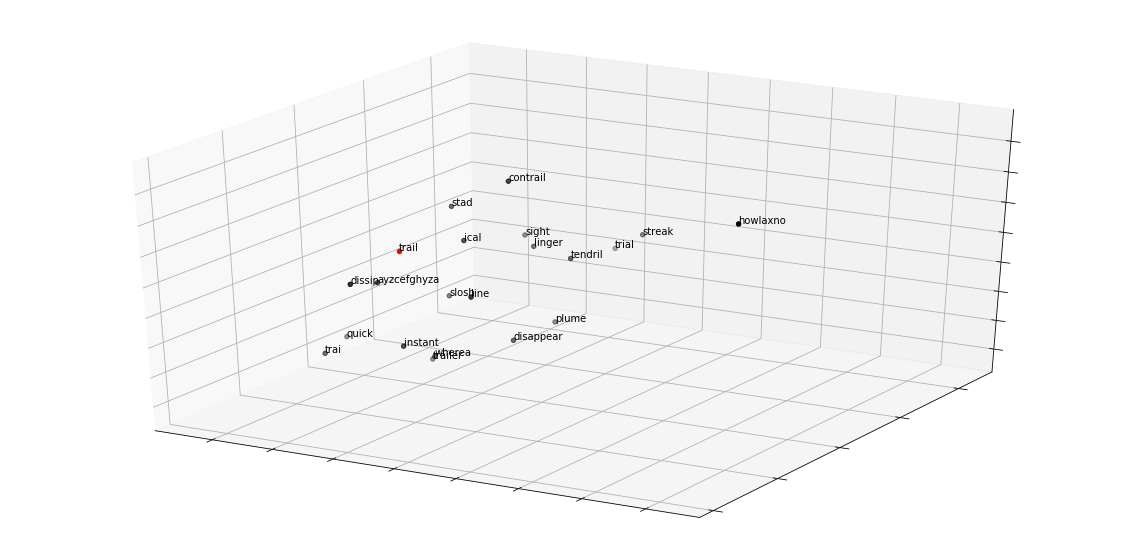

In [40]:
plot_words_similar("trail",word2vec_chemtrails)    